<a href="https://colab.research.google.com/github/anirbanghoshsbi/.github.io/blob/master/experimental/new/MMI_Monthly_return.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

"To find the relationship between RSI and monthly returns you can use the k-means technique of unsupervised learning. The steps are as follows:

1. Calculate RSI and monthly returns
2. Scale the data
3. Apply k-means for optimum number of clusters. Use the WCSS technique to select the optimum clusters.
4. Plot the clusters on the X-Y chart and see the relationship between RSI values and monthly returns."

In [168]:
#!pip install yfinance
#!pip install pandas_ta==0.2.45b0

In [169]:
#import yfinance as yf
import pandas as pd
import numpy as np
#import pandas_ta as ta
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


In [170]:
from sklearn.preprocessing import StandardScaler

In [171]:
data=pd.read_csv('/content/MMI_2022-01-03.csv')

In [172]:
data=data[::-1]

In [173]:
data['ret30']=data[' Market Mood Index'].pct_change(30)
data['ret_nifty']=data[' Nifty Index'].pct_change(30)
print()

In [174]:
data.tail(5)

,Date,Market Mood Index,Nifty Index,ret30,ret_nifty
4,27/12/2021,35.431692,17086.25,-0.231422,-0.056152
3,28/12/2021,42.642083,17233.25,-0.204627,-0.048384
2,29/12/2021,54.428337,17213.60,0.109285,-0.043646
1,30/12/2021,57.055673,17203.95,0.212414,-0.038813
0,31/12/2021,63.256005,17354.05,0.433429,-0.023122


In [175]:
selected_data=data[['ret_nifty','ret30']].dropna()

In [176]:
selected_data.shape

(2364, 2)

In [177]:
selected_data.tail(2)

,ret_nifty,ret30
1,-0.038813,0.212414
0,-0.023122,0.433429


In [178]:
sc=StandardScaler()

In [179]:
data_transformed=pd.DataFrame(sc.fit_transform(selected_data), columns = selected_data.columns)
data_transformed

,ret_nifty,ret30
0,-0.794595,-0.701736
1,-1.050492,-0.944323
2,-1.148807,-0.829172
3,-0.712187,-0.273558
4,-0.544046,-0.012197
...,...,...
2359,-1.254135,-0.548650
2360,-1.120714,-0.513945
2361,-1.039350,-0.107364
2362,-0.956334,0.026210


In [180]:
kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42,
    }
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(data_transformed)
    sse.append(kmeans.inertia_)

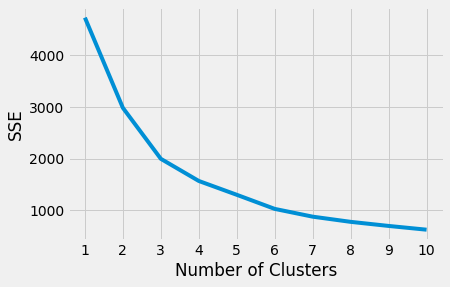

In [181]:
plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [182]:
kmeans = KMeans(n_clusters=5, **kmeans_kwargs)
kmeans.fit(data_transformed)

KMeans(init='random', n_clusters=5, random_state=42)

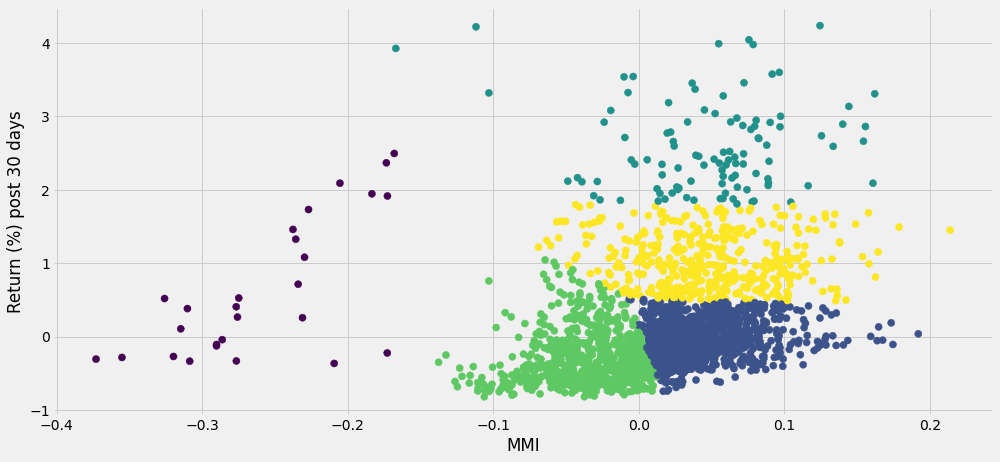

In [183]:
# Getting list of cluster numbers for each data point in X
clusters = kmeans.predict(data_transformed)

# Plotting values
color_map = clusters
plt.figure(figsize=(15, 7))
plt.scatter(selected_data.iloc[:, 0],
            selected_data.iloc[:, 1], c=color_map, s=50, cmap='viridis')

# Plotting centroids
centroids = kmeans.cluster_centers_
#plt.scatter(centroids[:, 0], centroids[:, 1], c='black', s=200, alpha=0.5)
plt.xlabel('MMI')
plt.ylabel('Return (%) post 30 days')

plt.show()

In [184]:
#data_transformed['pct_change']=data[' Nifty Index'][7:].pct_change(-7).dropna().values

In [185]:
#data_transformed['sign']=np.sign(data[' Nifty Index'][:].pct_change(-1).dropna().values)

In [186]:
d=pd.DataFrame([clusters[-800:],data[' Nifty Index'][-800:].values]).T

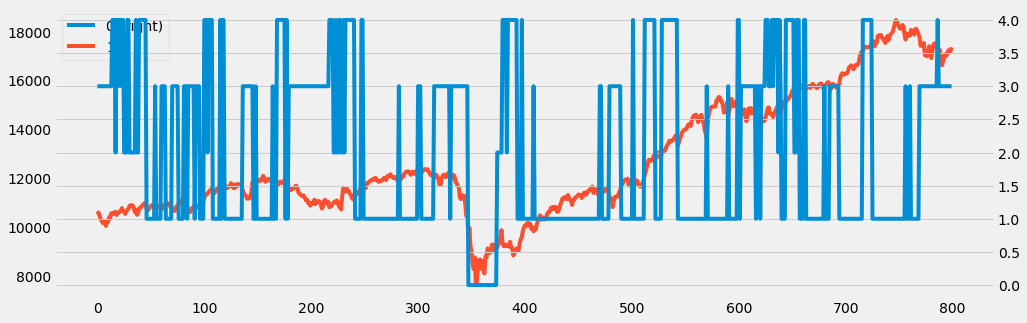

In [187]:
d.plot(secondary_y=[0],figsize=(15,5));

In [188]:
d.columns=['cluster','close']

In [189]:
d['signal']=np.where(d['cluster']==2,3,d['cluster'])
d['signal']=np.where(d['cluster']==1,0,d['cluster'])

In [190]:
final= d[['close','signal']]

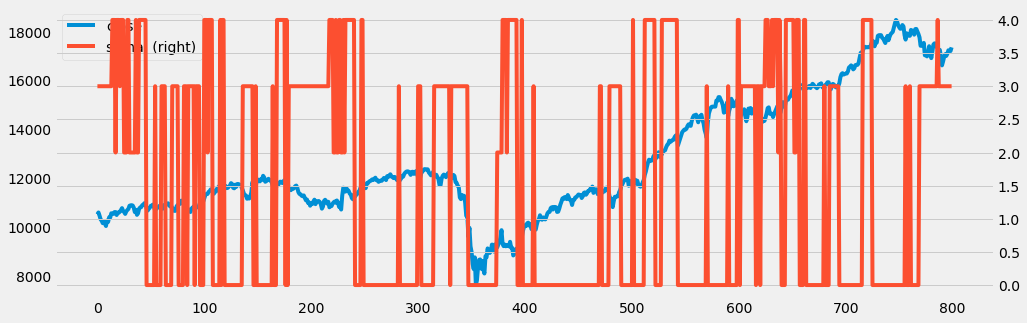

In [191]:
final.plot(secondary_y=['signal'],figsize=(15,5));